In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

<ErrorbarContainer object of 3 artists>

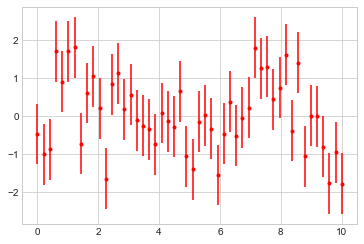

In [10]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.r')

<ErrorbarContainer object of 3 artists>

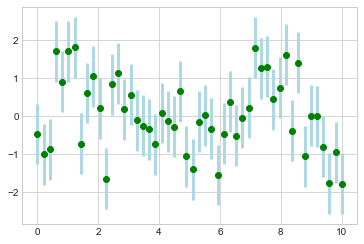

In [11]:
plt.errorbar(x, y, yerr=dy,
            fmt='go', ecolor='lightblue',
            elinewidth=3, capsize=0)

(0, 10)

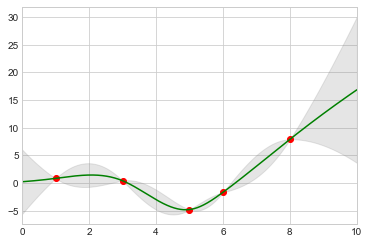

In [14]:
# 连续变量误差的可视化
from sklearn.gaussian_process import GaussianProcess

model = lambda x: x * np.sin(x)
x_data = np.array([1,3,5,6,8])
y_data = model(x_data)

# 计算高斯过程拟合结果
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1, random_start=100)
gp.fit(x_data[:, np.newaxis], y_data)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)   # 2*sigma-95%置信区间

# 结果可视化
plt.plot(x_data, y_data, 'or')
plt.plot(xfit, yfit, '-g')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray',alpha=0.2)
plt.xlim(0, 10)